<a href="https://colab.research.google.com/github/castelwoah/PlayData/blob/main/workspace/teachingcode/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 한글 설정
* matplotlib의 기본 설정은 영문으로 설정되어 있어 한글이 깨짐

In [49]:
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm

font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()

FileNotFoundError: [Errno 2] No such file or directory: '/content/malgun.ttf'

# [matplotlib 기초](https://codetorial.net/matplotlib/index.html)
> 공식 문서: https://matplotlib.org/stable/index.html  
  
- matplotlib은 Matlab을 모방하여 만든 오프소스 데이터 시각화 파이썬 라이브러리
- 파이썬 시각화에 큰 공헌을 한 시각화 라이브러리로서 다른 시각화 라이브러리에 많은 영향을 미쳤으며, 여전히 파이썬 세계에서 시각화를 위해서 가장 많이 사용됨
- plt.figure: 축과 그래프, 그래프의 제목 같은 것들을 표시할 수 있는 컨테이너
- plt.axes: 눈금과 레이블, 그래프가 있는 테두리박스로 시각화를 형성하는 좌표평면
- 직관적이지 못한 개발 api로 인한 시각화 연습이 많이 필요.
- 다른 시각화 패키지인 Seaborn은 matplotlib보다 쉬운 구현, 수려한 시각화, 그리고 편리한 Pandas와의 연동을 특징으로 가지고 있습니다.
    - Seaborn 또한 Matplotlib 기반으로 하고 있으며, 특정 요소들의 경우 Matplotlib 함수들을 그대로 사용하고 있기에 Seaborn을 잘 활용하려면 반드시 Matplotlib를 어느정도 알고 있어아 함

# pyplot 모듈의 이해
- pyplot은 시각화를 위한 기반 모듈이며 이를 통해 시각화를 구현

## pyplot의 두 가지 중요 요소 - Figure와 Axes 이해
### Figure
- Figure 객체는 그림을 그리기 위한 캔버스의 역할을 함
- 그림판의 크기를 조절한다든가, 플롯을 최종적으로 화면에서 나타내는 역할을 수행
- 하지만 실제적으로 그림을 그리는 역할은 수행하지 않음

### Axes
- 실제 그림을 그리는 메서드(함수)을 가짐
- 그래서 대부분의 시각화를 수행하는데 메서드들을 Axes에서 호출됨
- 또한 X축, Y축, 타이틀, 범례 등의 속성을 설정하는 데도 이용됨
- Axes(축 Axis의 복수형)라는 이름이 주는 인상 때문에 단순히 X축이나 Y축에 관련된 설정 정도의 역할을 수행할 것이라는 선입견과는 다르게 시각화와 관련된 많은 작업들이 이 Axes 객체 기반에서 수행됨
- 반면 위에서 언급한 Figure는 그림을 그리는 실제 작업에는 크게 연관되어 있지 않음

![image.png](attachment:image.png)

- plt.plot()
    - 기본으로 설정된 Axes에서 Axes.plot() 함수를 호출하여 그림을 그림
    - Axes.plot()은 다시 Line2D 객체를 호출하여 선 그래프를 그림
- plt.title()
    - 내부적으로 다시 Axes.set_title() 함수를 호출하여 타이틀을 설정

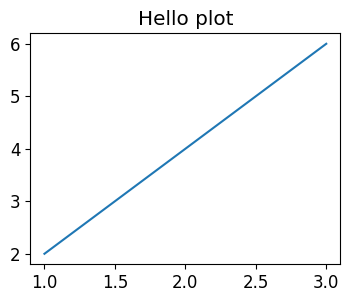

In [50]:
# x축 입력값 [1,2,3], y축 입력값 [2,4,6]으로 선 그래프 생성
plt.plot([1,2,3], [2,4,6])

# 선그래프 타이틀을 Hello plot으로 설정
plt.title("Hello plot")

# 선 그래프를 출력
plt.show()


## Figure와 Axis의 활용
- Figure는 주로 전체 그림판의 크기를 조절하는데 사용
- plt.figure(figsize=(10,4))와 같이 plt 모듈의 figure() 함수를 호출하면 Figure 객체가 반환
- 이땐 인자로 figsize=(가로크기, 세로크기) 입력하면 해당 크기를 가지는 Figure 객체를 반환
- Figure가 실제로 그림을 그리는 많은 역할을 하지 못하지만 그림판의 배경 색깔을 바꾸는 등의 설정은 할 수 있음
- figure() 함수의 인자로 facecolor = 'yellow'를 통해 그림판의 배경색을 노란색으로 변경
    - 전체 그림판이 노란색으로 변하지는 않음
    - Axes가 차지하는 영역이 Figure가 차지하는 그림판 위에 적용되기 때문임
- plt의 axes() 함수는 현재 사용하는 Axes 객체를 반환

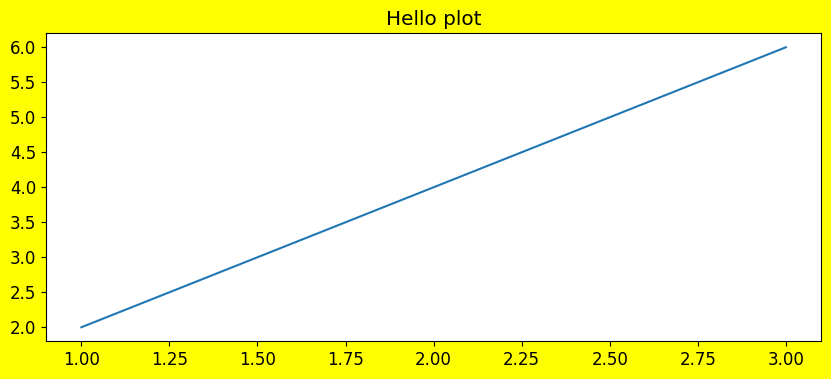

In [51]:
plt.figure(figsize=(10,4), facecolor='yellow')
plt.plot([1,2,3], [2,4,6])
plt.title("Hello plot")
plt.show()


<class 'matplotlib.axes._axes.Axes'>


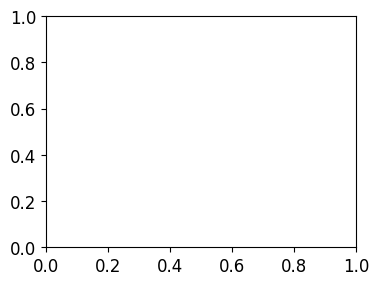

In [52]:
ax = plt.axes()
print(type(ax))

- plt.axes()로 반환된 객체 AxesSubplot는 Axes의 실체화된 하위 클래스로 보면 됨
- plt.axes()만 호출했는데도 축을 포함한 그림이 표출된 이유는 pyplot 모듈이 import되어 있는 상태에서 주피터 노트북은 별도의 plt.show()가 없더라도 Axes가 할당되어 있으면 자동으로 plt.show()와 같은 역할을 하는 함수를 호출하여 그림을 출력
------
- pyplot에서 Figure와 Axes 객체를 함께 가져올수 있는데 이는 plt.subplots()을 이용
- plt의 subplot() 함수는 인자로 여러 개의 Axes를 설정할 수 있음

fig type: <class 'matplotlib.figure.Figure'> 
as type: <class 'matplotlib.axes._axes.Axes'>


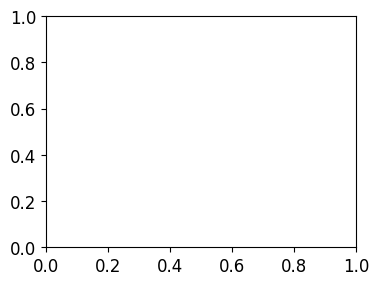

In [53]:
# pyplot에서 설정된 Figure와 Axes 객체를 함께 가져오기
fig, ax = plt.subplots()
print('fig type:', type(fig), '\nas type:', type(ax))

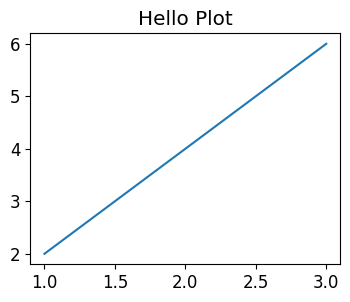

In [54]:
# pyplot에서 설정된 Figure와 Axes 객체를 함께 가져오기
fig, ax = plt.subplots()

# Axes 객체의 plot()을 이용하여 선 그래프를 그림
ax.plot([1,2,3], [2,4,6])


# Axes 객체의 set_title()을 이용하여 선 그래프 타이틀을 Hello plot으로 설정
ax.set_title("Hello Plot")
plt.show()

# pyplot의 plot() 함수를 이용해 선 그래프 그리기
- plot()함수는 선 그래프를 그릴 때 활용됩니다. X 좌표 값, Y 좌표 값으로 파이썬 리스트, 넘파이 ndarry, 판다스(Pandas)의 DataFrame/Series 모두 적용 가능합니다.
- 다만 입력되는 X 좌표 값과 Y 좌표 값의 개수는 모두 같은 크기여야 함

## 단일 그래프
- plot
  - line plot을 그려주는 함수
  - figure, axes 없으면, 이를 만들어서 그려준다.

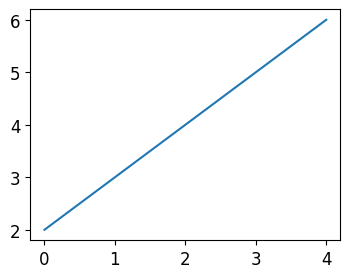

In [55]:
plt.plot(np.arange(2,7))
plt.show()

## 다중 그래프
- 1개의 axes 안에 여러개의 그래프를 그린다.

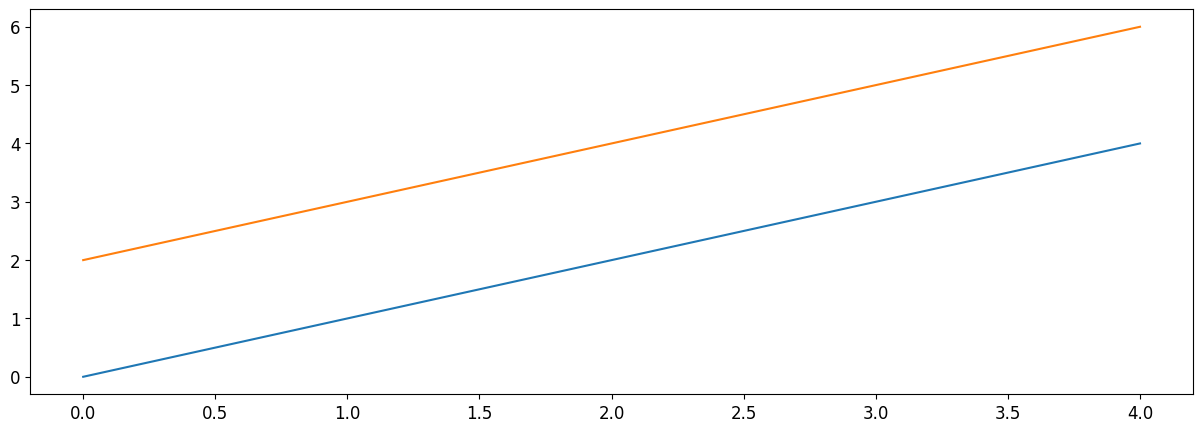

In [56]:
# 틀 크기 (너비, 높이)
plt.figure(figsize=[15,5])
# 그래프 2개
plt.plot(np.arange(5))
plt.plot(np.arange(2,7))
# 화면에 표시
plt.show()

## subplots
- plt.subplots() 함수는 주로 여러 개의 subplot을 생성하는데 활용
- 즉 하나의 Figure상에서 여러 개의 그래프를 그릴 수 있게 만들어주는데, 이때 개별 subplot은 하나의 Axes를 가지게 됨
- 즉 plt.subplots()은 여러 개의 그래프를 그릴 수 있게 하는 1개의 Figure와 여러 개의 Axes를 생성하고 반환
- plt.subplots()의 주요 인자로 nrows와 ncols, 그리고 figsize가 사용됨.
- subplot들의 배치를 2차원 행렬 형태로 표현할 때 행의 개수가 되며, ncols는 열의 개수가 됨
- 그리고 figsize는 모든 subplot들을 포함한 전체 Figure의 크기를 설정합니다.

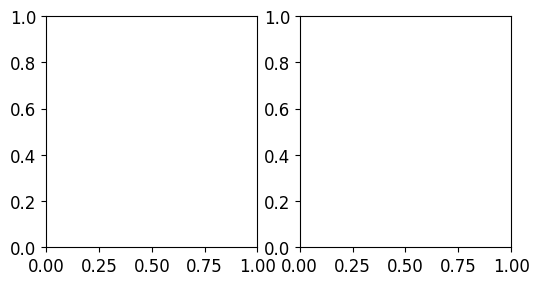

In [57]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6,3))

(2, 2)


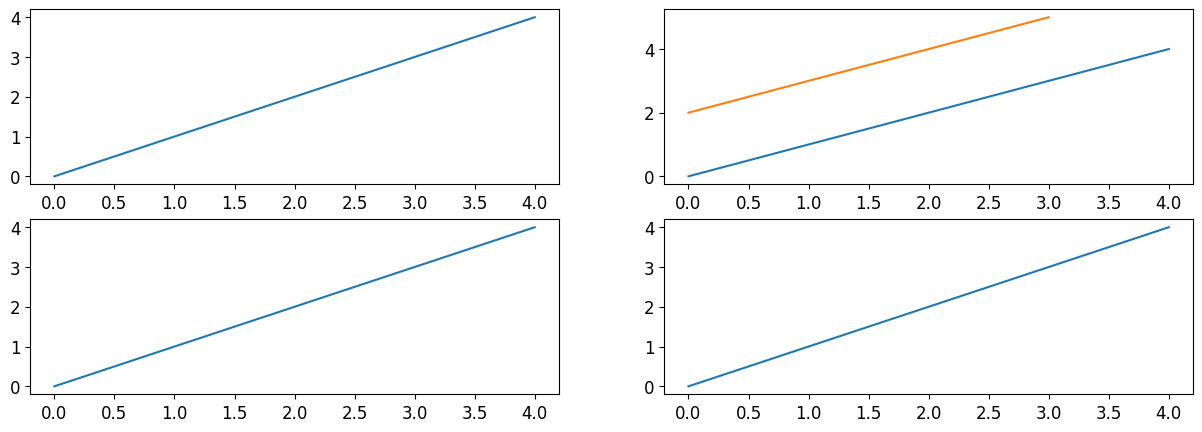

In [58]:
fig, ax = plt.subplots(2,2,figsize=[15,5])
print(ax.shape)

ax[0,0].plot(np.arange(5)) # 첫번째 왼쪽
ax[0,1].plot(np.arange(5)) # 첫번째 오른쪽
ax[0,1].plot(np.arange(2,6)) # 첫번째 오른쪽
ax[1,0].plot(np.arange(5)) # 두번째 왼쪽
ax[1,1].plot(np.arange(5)) # 두번째 오른쪽
plt.show()

* 같은 결과의 그래프를 plt를 이용하여 그리면 아래와 가다.
* 코드를 비교해보면 두 방식의 차이가 명확하게 보일 것이다 .

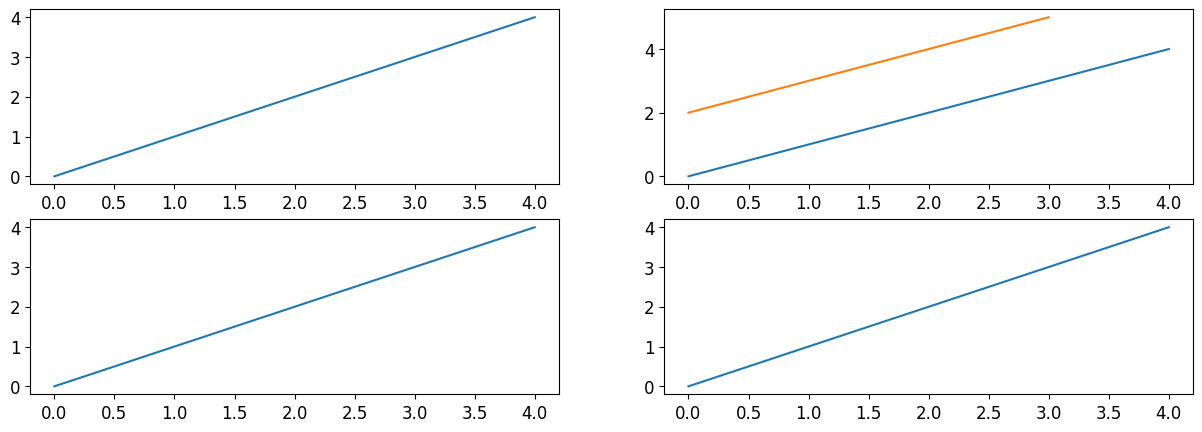

In [59]:
arr = np.arange(5)
arr1 = np.arange(2,6)
plt.figure(figsize=[15,5])

plt.subplot(2,2,1)
plt.plot(arr)

plt.subplot(2,2,2)
plt.plot(arr)
plt.plot(arr1)

plt.subplot(2,2,3)
plt.plot(arr)

plt.subplot(2,2,4)
plt.plot(arr)

plt.show()

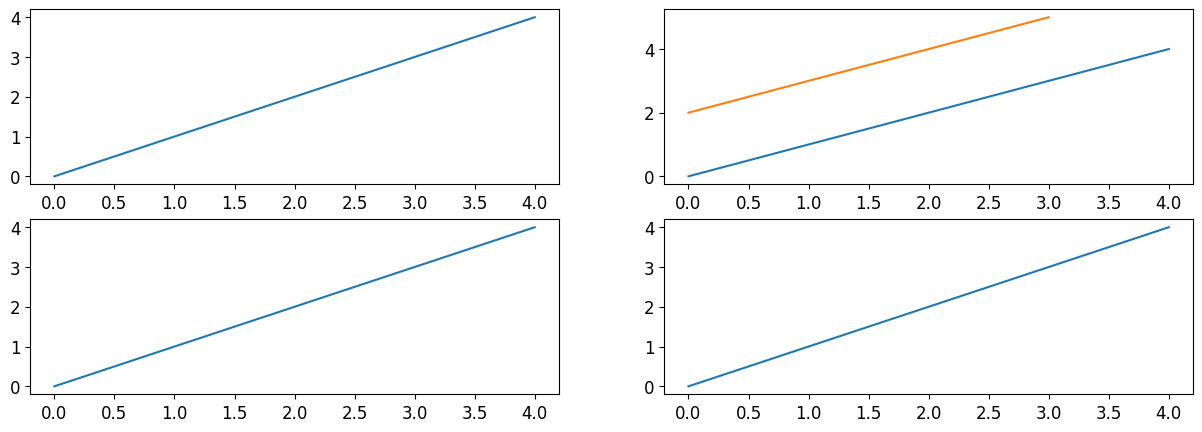

In [60]:
arr = np.arange(5)
arr1 = np.arange(2,6)
plt.figure(figsize=[15,5])

plt.subplot(221)
plt.plot(arr)

plt.subplot(222)
plt.plot(arr)
plt.plot(arr1)

plt.subplot(223)
plt.plot(arr)

plt.subplot(224)
plt.plot(arr)

plt.show()

# plt와 Axes 객체에서 작업하기
- 같은 결과물을 두 가지 버전으로 작성

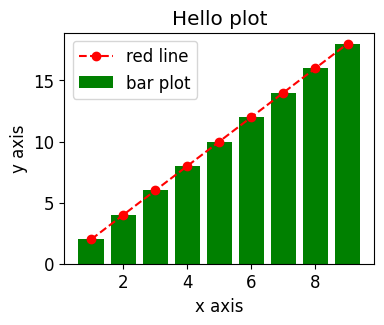

In [61]:
x_value_01 = np.arange(1, 10)
y_value_01 = 2*x_value_01

# 마커를 포함한 빨간선 대쉬 선 그래프를 그리고, label은 'red line'으로 설정
plt.plot(x_value_01, y_value_01, color='red', marker='o', linestyle='dashed', label='red line')
# X값에 따른 Y값을 나타내는 초록색 막대 그래프를 그리고 label은 'bar plot'으로 설정
plt.bar(x_value_01, y_value_01, color='green', label='bar plot')
plt.xlabel('x axis')
plt.ylabel('y axis')
# 두개의 그래프에서 label설정된 문자열 값을 범례로 표시
plt.legend()

plt.title('Hello plot')

plt.show()

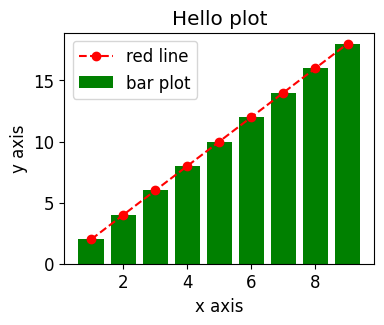

In [62]:
figure = plt.figure()
# Axes 객체를 추출하여 ax변수에 할당.
ax = plt.axes()

# plt.plot( )은 ax.plot( )으로 plt.bar( )는 ax.bar( )로 변경.
ax.plot(x_value_01, y_value_01, color='red',  marker='o', linestyle='dashed', label='red line')
ax.bar(x_value_01, y_value_01, color='green', label='bar plot')

# plt.xlabel( )은 ax.set_xlabel( )로, plt.ylabel( )은 ax.set_ylabel( )로 변경
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')

# ax.set_legend()가 아니라 ax.legend()임.
ax.legend()
# plt.title( )을 plt.set_title( )로 변경
ax.set_title('Hello plot')

plt.show()

## 타이틀

### figure의 제목: suptitle()

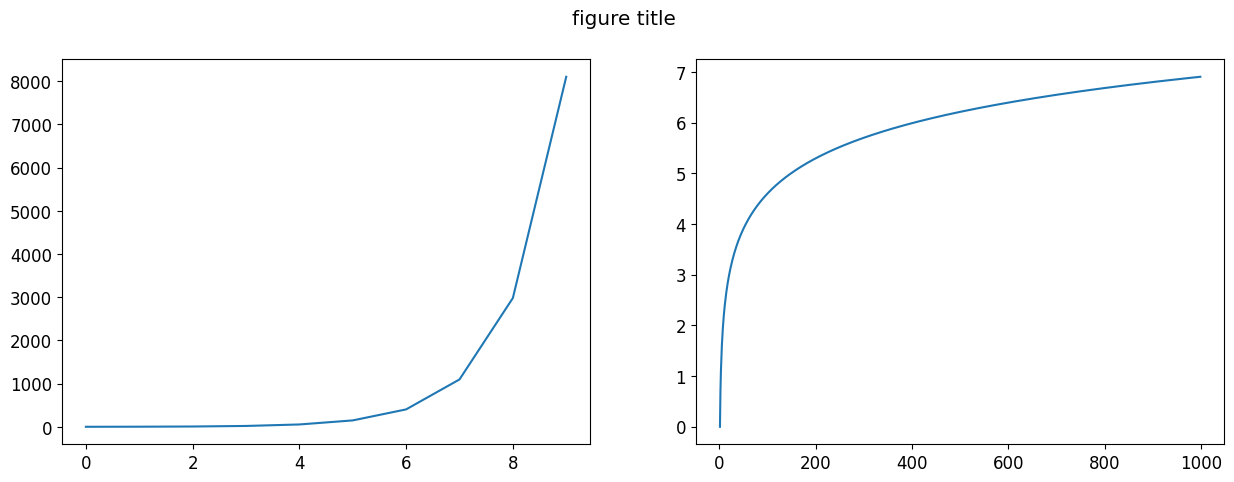

In [63]:
fig , ax = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("figure title")

x = range(0,10) # x축
y = np.exp(x) # y축
ax[0].plot(x,y)

x = range(1,1000) # x 축
y = np.log(x) # y 축
ax[1].plot(x,y)

plt.show()

### axes의 제목: set_title()

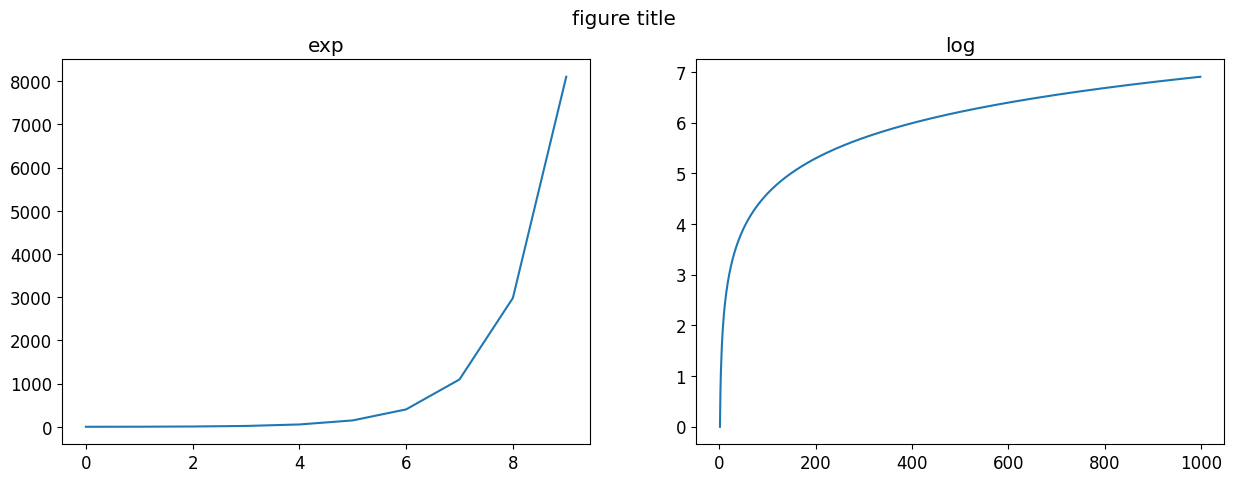

In [64]:
fig , ax = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("figure title")

x = range(0,10) # x축
y = np.exp(x) # y축
ax[0].plot(x,y)
ax[0].set_title("exp")

x = range(1,1000) # x 축
y = np.log(x) # y 축
ax[1].plot(x,y)
ax[1].set_title("log")

plt.show()

### 축 제목
- x축 제목: set_xlabel()
- y축 제목: set_ylabel()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


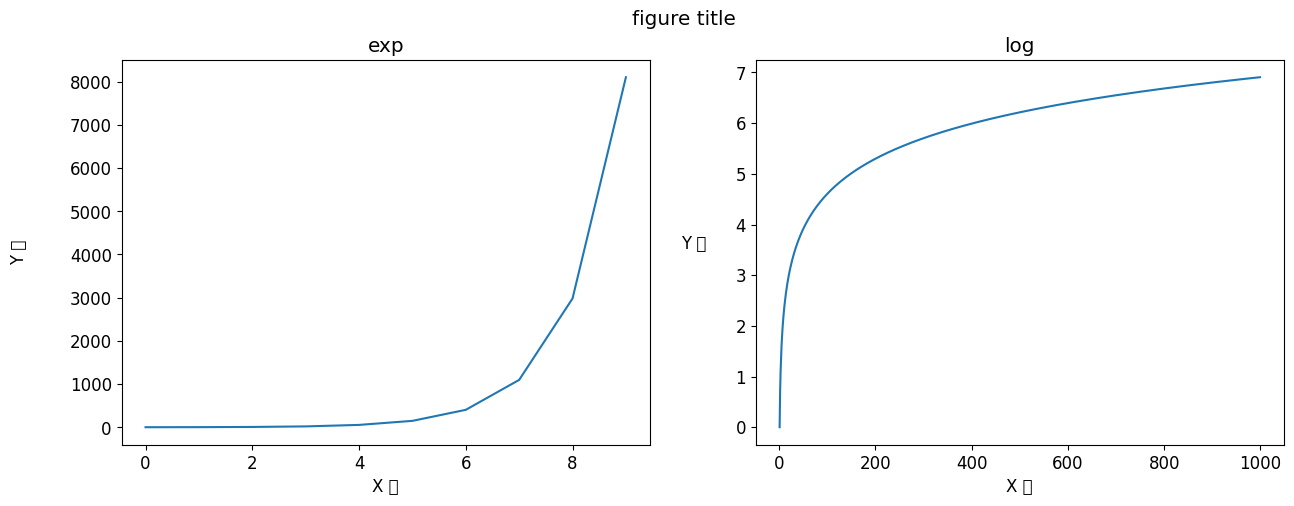

In [65]:
fig , ax = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("figure title")

x = range(0,10) # x축
y = np.exp(x) # y축
ax[0].plot(x,y)
ax[0].set_title("exp")
ax[0].set_xlabel("X 축")
ax[0].set_ylabel("Y 축",rotation=90,labelpad=30)

x = range(1,1000) # x 축
y = np.log(x) # y 축
ax[1].plot(x,y)
ax[1].set_title("log")
ax[1].set_xlabel("X 축")
ax[1].set_ylabel("Y 축",rotation=0,labelpad=30)

plt.show();

## 눈금

In [66]:
x = range(1,1000)
y = np.log(x)

### 눈금회전
- axes의 tick_params()

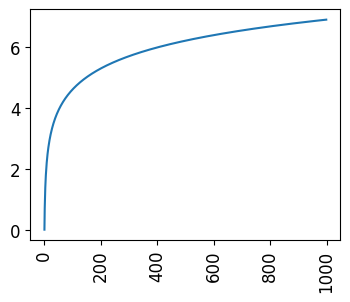

In [67]:
fig,ax = plt.subplots()
ax.plot(x,y)

# 눈금회전
ax.tick_params(axis="x", labelrotation=90)

plt.show()

### 눈금 지정
- axes의 set_xticks(), set_yticks()

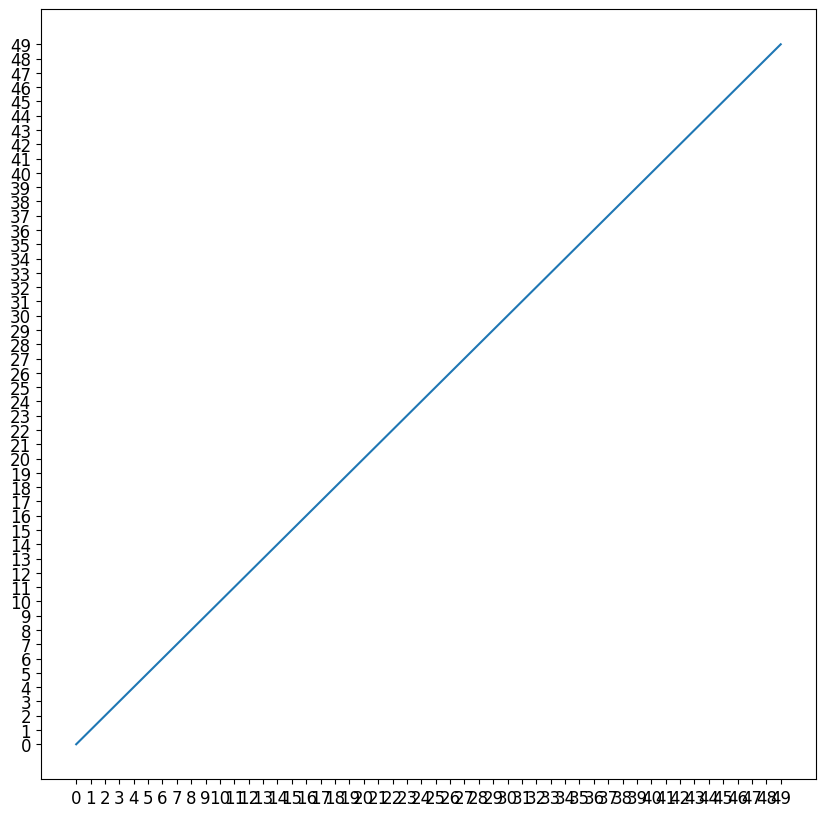

In [68]:
fig,ax = plt.subplots(figsize=[10,10])
ax.plot(range(50))

# 눈금 지정
ax.set_xticks(range(50))
ax.set_yticks(range(50))

plt.show()

## 그래프 스타일

### marker

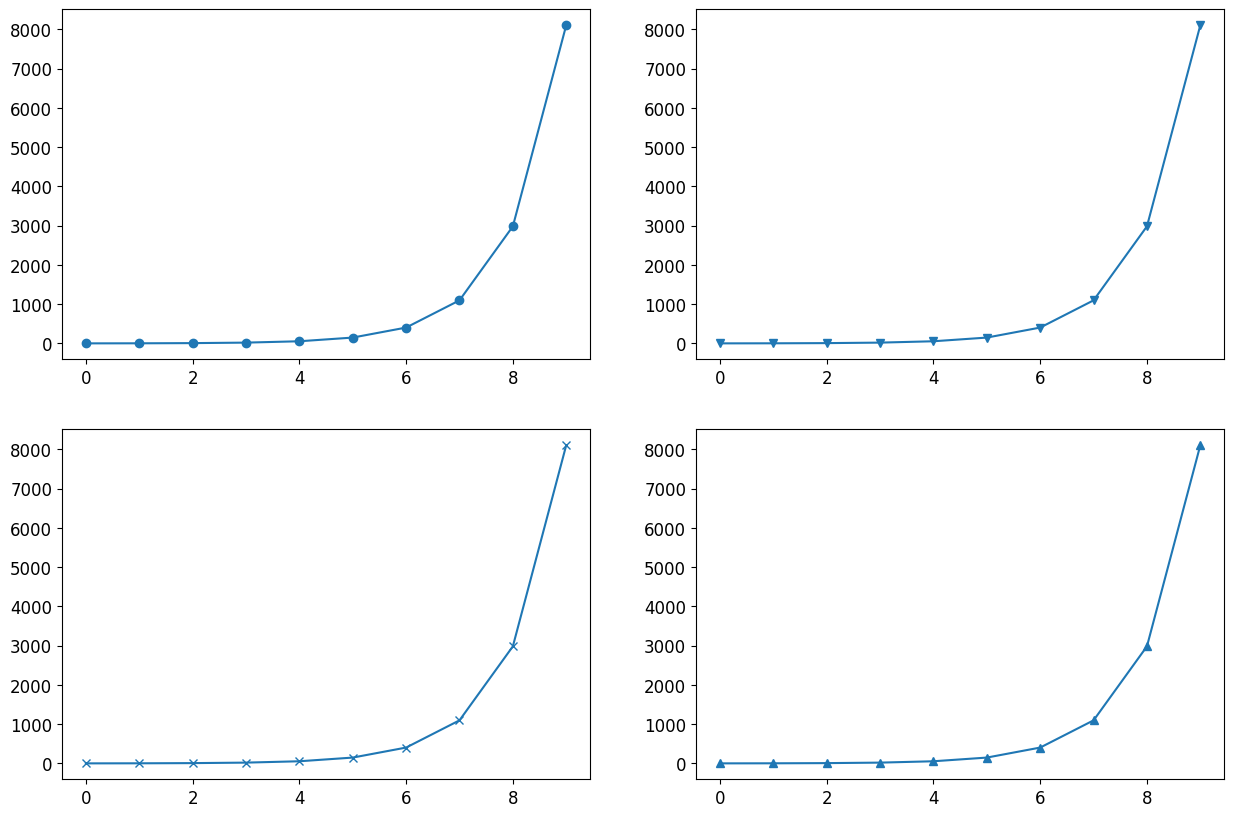

In [69]:
y = np.exp(range(0,10))
fig , ax = plt.subplots(2,2,figsize=[15,10])

# marker
ax[0,0].plot(y,marker="o")
ax[0,1].plot(y,marker="v")
ax[1,0].plot(y,marker="x")
ax[1,1].plot(y,marker="^")

plt.show()

### line style

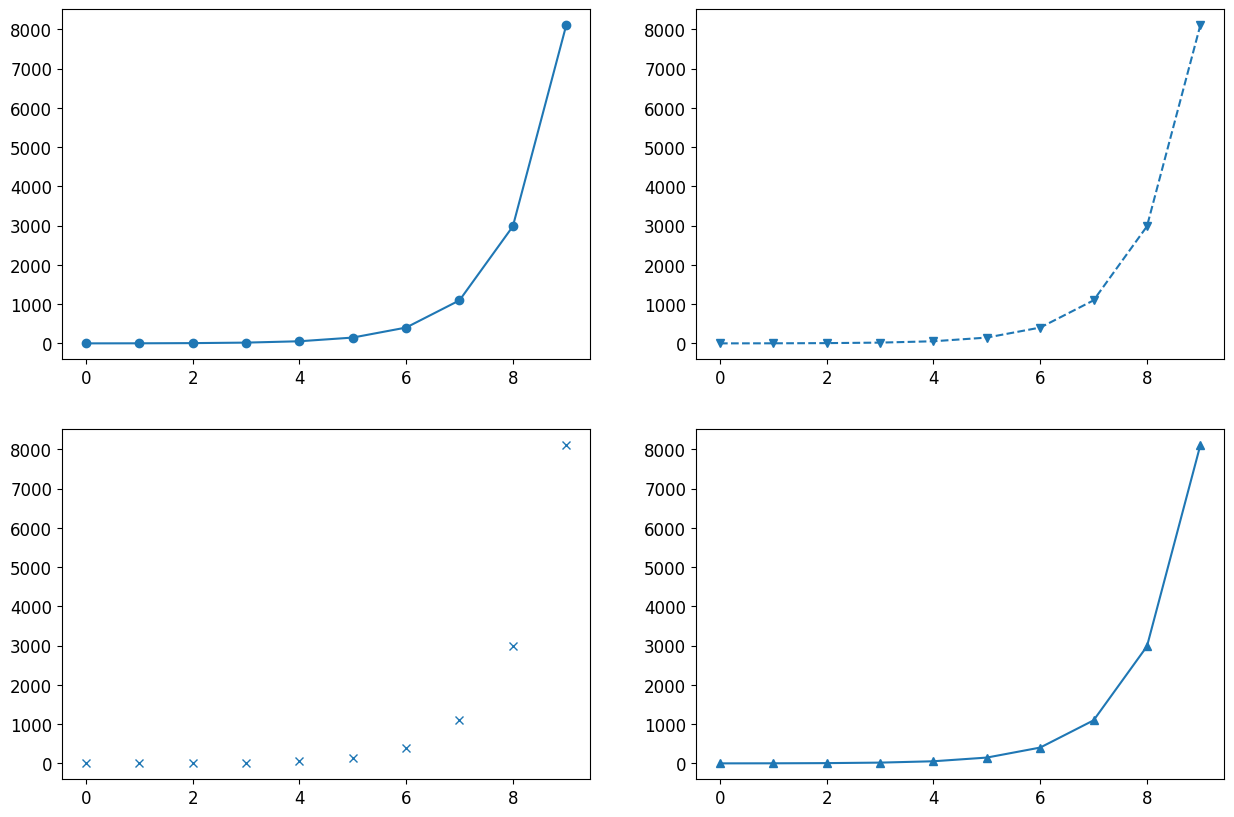

In [70]:
y = np.exp(range(0,10))
fig , ax = plt.subplots(2,2,figsize=[15,10])

# line style
ax[0,0].plot(y,marker="o")
ax[0,1].plot(y,marker="v",linestyle='--')
ax[1,0].plot(y,marker="x",linestyle='')
ax[1,1].plot(y,marker="^")

plt.show()

### color

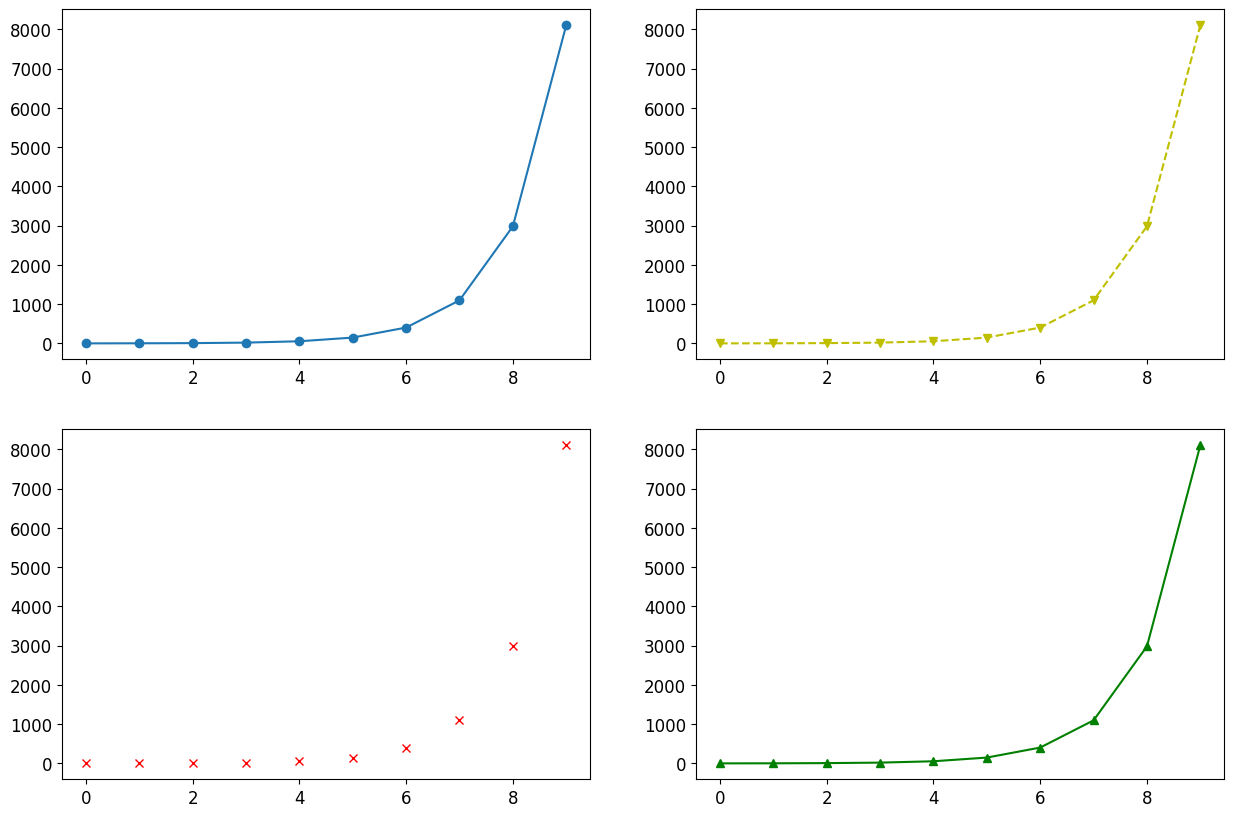

In [71]:
y = np.exp(range(0,10))
fig , ax = plt.subplots(2,2,figsize=[15,10])

# color
ax[0,0].plot(y,marker="o")
ax[0,1].plot(y,marker="v",linestyle='--',color="y")
ax[1,0].plot(y,marker="x",linestyle='',color="r")
ax[1,1].plot(y,marker="^",color="g")

plt.show()

## 범례 표시
- axes의 legend()

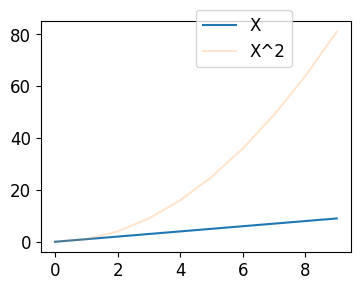

In [72]:
fig,ax = plt.subplots()
x = np.arange(10)

ax.plot(x)
ax.plot(x**2,alpha = 0.2) # alpha 투명도 0~1 사이값을 넣어주면된다.
# 범례 표시
ax.legend(["X","X^2"],loc=[0.5,0.8])

plt.show()

# matplotlib 심화

## 선 그래프

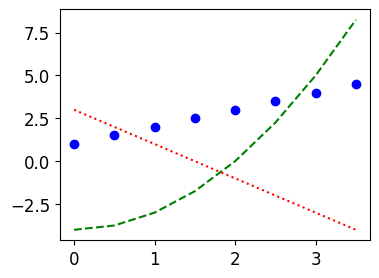

In [73]:
x = np.arange(0, 4, 0.5)

plt.plot(x, x + 1, 'bo')
plt.plot(x, x**2 - 4, 'g--')
plt.plot(x, -2*x + 3, 'r:')

plt.show()

### 수평선 그리기
- axhline(y, xmin, xmax)
> xmin, xmax 값은 0에서 1사이의 값을 입력한다. 0은 왼쪽 끝, 1은 오른쪽 끝을 의미함
- hlines(y, xmin, xmax)
> 점(xmin,y)에서 점(xmax,y)를 따라 수평선을 표시함

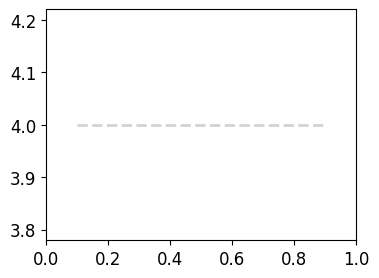

In [74]:
plt.axhline(4.0, 0.1, 0.9, color='lightgray', linestyle='--', linewidth=2)

plt.show()

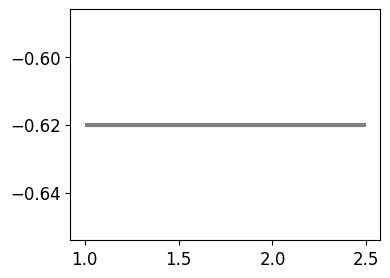

In [75]:
plt.hlines(-0.62, 1.0, 2.5, color='gray', linestyle='solid', linewidth=3)

plt.show()

### 수직선 그리기
- axvline(x, ymin, ymax)
- vlines(x, ymin, ymax)

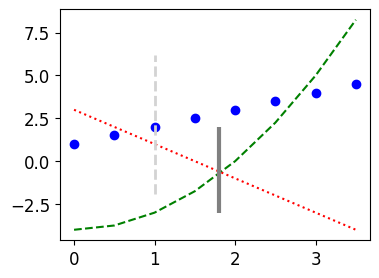

In [76]:
plt.plot(x, x + 1, 'bo')
plt.plot(x, x**2 - 4, 'g--')
plt.plot(x, -2*x + 3, 'r:')

plt.axvline(1.0, 0.2, 0.8, color='lightgray', linestyle='--', linewidth=2)
plt.vlines(1.8, -3.0, 2.0, color='gray', linestyle='solid', linewidth=3)

plt.show()

## 막대 그래프(Bar graph)
> 범주가 있는 데이터 값을 직사각형의 막대로 표현하는 그래프

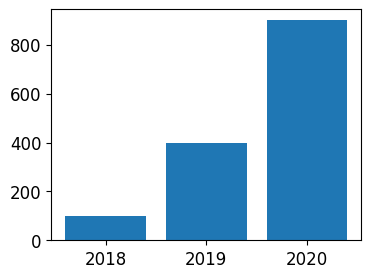

In [77]:
x = np.arange(3)
years = ['2018', '2019', '2020']
values = [100, 400, 900]

plt.bar(x, values)
plt.xticks(x, years)

plt.show()

### 막대 색상

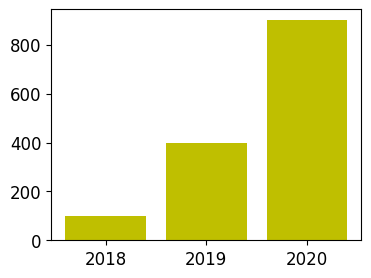

In [78]:
plt.bar(x, values, color='y')
# plt.bar(x, values, color='dodgerblue')
# plt.bar(x, values, color='C2')
# plt.bar(x, values, color='#e35f62')
plt.xticks(x, years)

plt.show()

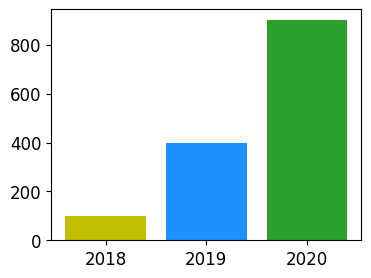

In [79]:
colors = ['y', 'dodgerblue', 'C2']

plt.bar(x, values, color=colors)
plt.xticks(x, years)

plt.show()

### 막대 폭

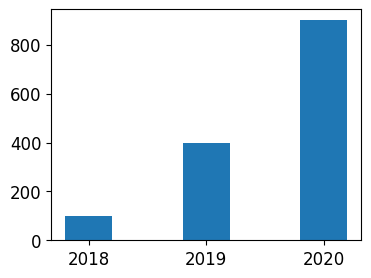

In [80]:
plt.bar(x, values, width=0.4)
# plt.bar(x, values, width=0.6)
# plt.bar(x, values, width=0.8)
# plt.bar(x, values, width=1.0)
plt.xticks(x, years)

plt.show()

### 수평 막대 그래프

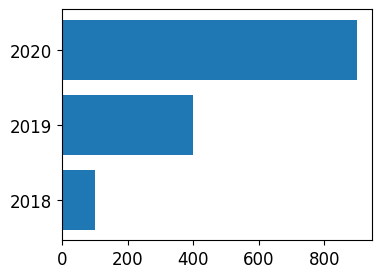

In [81]:
plt.barh(x, values)
plt.yticks(x, years)

plt.show()

## 산점도 그리기
> 두 변수의 상관 관계를 직교 좌표계의 평면에 점으로 표현하는 그래프

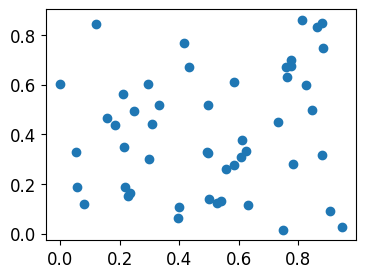

In [82]:
n = 50
x = np.random.rand(n)
y = np.random.rand(n)

plt.scatter(x, y)
plt.show()

### 색상과 크기
> plt.scatter(x, y, s=area, c=colors)
> - s: size
> - c: color

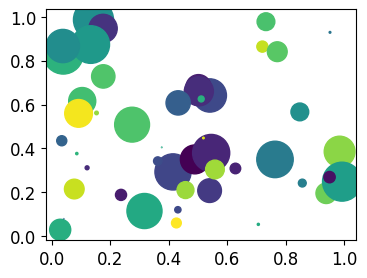

In [83]:
n = 50
x = np.random.rand(n)
y = np.random.rand(n)
area = (30 * np.random.rand(n))**2
colors = np.random.rand(n)

plt.scatter(x, y, s=area, c=colors)
plt.show()

### 투명도와 컬러맵
> plt.scatter(x, y, alpha=0.5, cmap='Spectral')
> - alpha: transparency
> - cmap: colormap

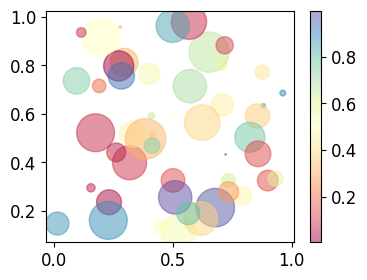

In [84]:
n = 50
x = np.random.rand(n)
y = np.random.rand(n)
area = (30 * np.random.rand(n))**2
colors = np.random.rand(n)

plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()
plt.show()

## 히스토그램(Histogram)
> 히스토그램은 도수분포표를 그래프로 나타낸 것으로서, 가로축은 계급/구간, 세로축은 도수(횟수나 개수 등)를 나타낸다.

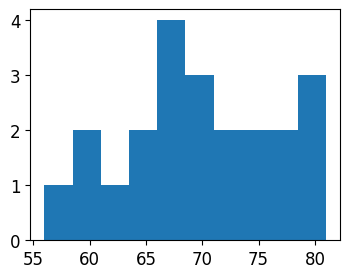

In [85]:
weight = [68, 81, 64, 56, 78, 74, 61, 77, 66, 68, 59, 71,
          80, 59, 67, 81, 69, 73, 69, 74, 70, 65]

plt.hist(weight)

plt.show()

### 구간 개수 지정하기
> bins 파라미터는 히스토그램의 가로축 구간의 개수를 지정합니다.

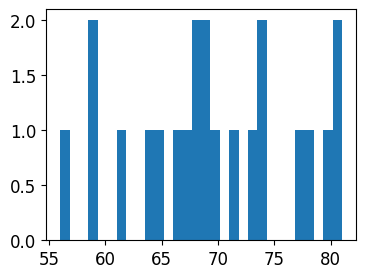

In [86]:
plt.hist(weight, bins=30)

plt.show()

### 누적 히스토그램
> cumulative 파라미터를 True로 지정하면 누적 히스토그램을 나타냅니다.

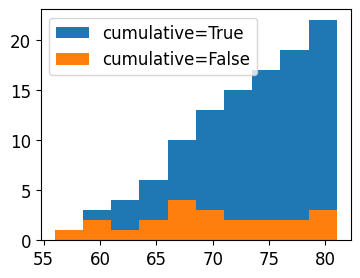

In [87]:
plt.hist(weight, cumulative=True, label='cumulative=True')
plt.hist(weight, cumulative=False, label='cumulative=False')

plt.legend(loc='upper left')
plt.show()

### 히스토그램 종류 지정하기

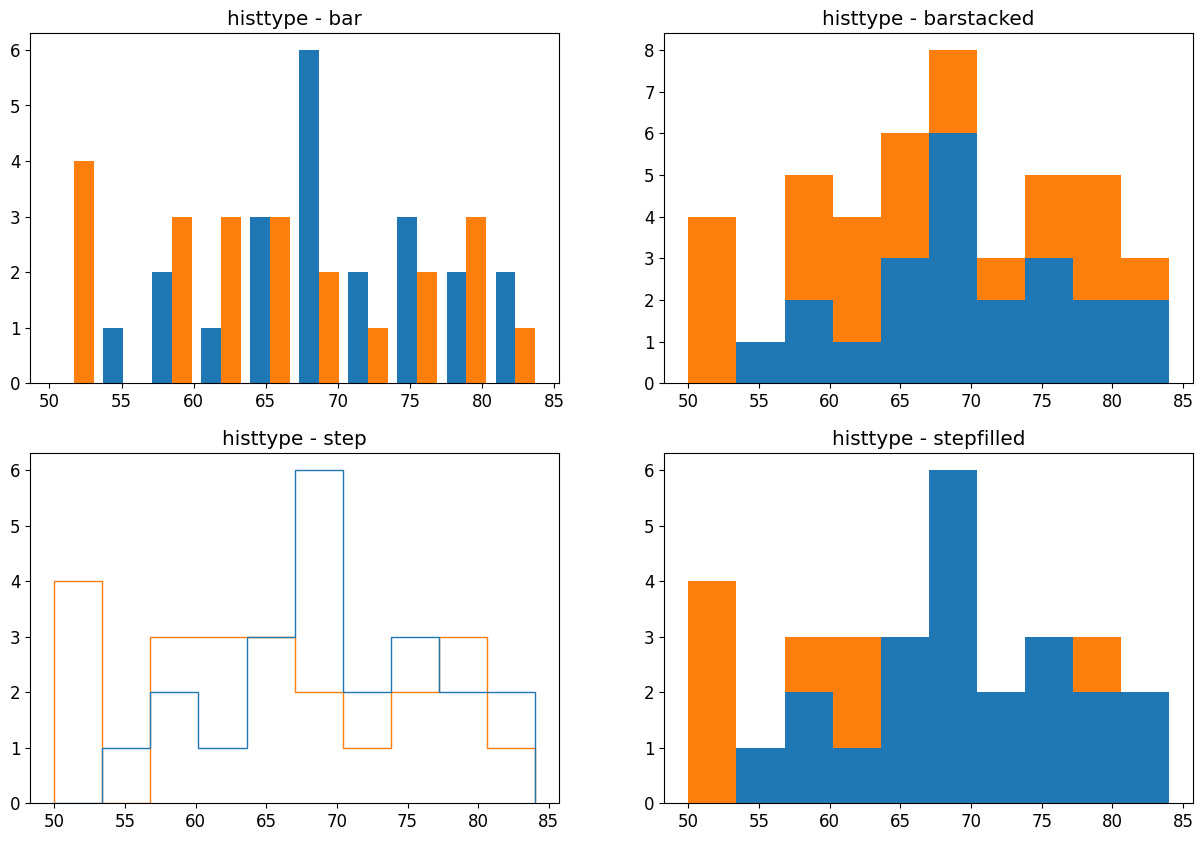

In [88]:
weight = [68, 81, 64, 56, 78, 74, 61, 77, 66, 68, 59, 71,
        80, 59, 67, 81, 69, 73, 69, 74, 70, 65]
weight2 = [52, 67, 84, 66, 58, 78, 71, 57, 76, 62, 51, 79,
        69, 64, 76, 57, 63, 53, 79, 64, 50, 61]

fig, ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].hist((weight, weight2), histtype='bar')
ax[0,0].set_title('histtype - bar')

ax[0,1].hist((weight, weight2), histtype='barstacked')
ax[0,1].set_title('histtype - barstacked')

ax[1,0].hist((weight, weight2), histtype='step')
ax[1,0].set_title('histtype - step')

ax[1,1].hist((weight, weight2), histtype='stepfilled')
ax[1,1].set_title('histtype - stepfilled')

plt.show()

## 에러바(오차막대) 표시
> 에러바는 데이터의 편차를 표시하기 위한 그래프이다.

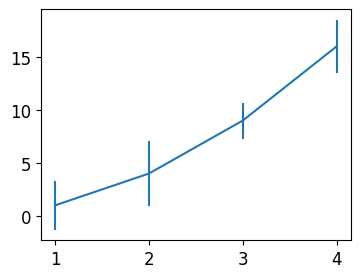

In [89]:
x = [1, 2, 3, 4]
y = [1, 4, 9, 16]
yerr = [2.3, 3.1, 1.7, 2.5] # 대칭 편차

plt.errorbar(x, y, yerr=yerr)
plt.show()

### 비대칭 편차

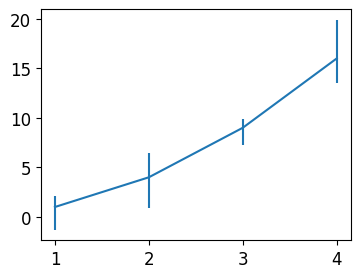

In [90]:
yerr = [(2.3, 3.1, 1.7, 2.5), (1.1, 2.5, 0.9, 3.9)]

plt.errorbar(x, y, yerr=yerr)
plt.show()

## 파이 차트
> 파이 차트(Pie chart, 원 그래프)는 범주별 구성 비율을 원형으로 표현한 그래프이다.

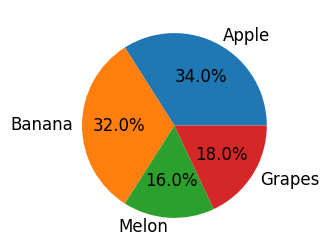

In [91]:
ratio = [34, 32, 16, 18]
labels = ['Apple', 'Banana', 'Melon', 'Grapes']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

### 시작 각도와 방향 설정
> plt.pie(ratio, startangle=260, counterclock=False)
> - startangle: 부채꼴이 그려지는 시작 각도
> - counterclock=False로 설정하면 시계 방향 순서로 부채꼴 영역이 표시된다.

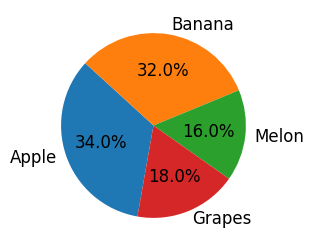

In [92]:
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

### 중심에서 벗어나는 정도 설정
> plt.pie(ratio, explode=[0, 0.1, 0, 0.1])
> - explode는 부채꼴이 파이 차트의 중심에서 벗어나는 정도

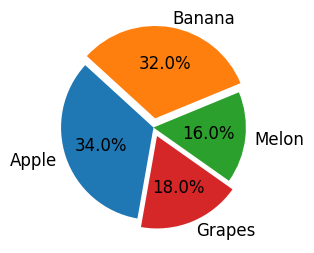

In [93]:
explode = [0, 0.10, 0, 0.10]

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode)
plt.show()

### 그림자 나타내기
> plt.pie(ratio, shadow=True)

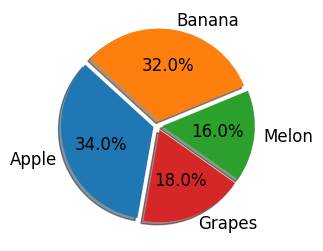

In [94]:
explode = [0.05, 0.05, 0.05, 0.05]

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True)
plt.show()

### 색상 지정하기

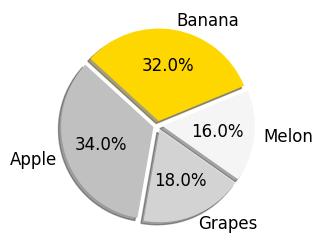

In [95]:
colors = ['silver', 'gold', 'whitesmoke', 'lightgray']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

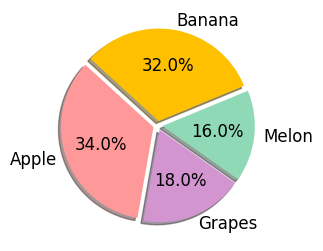

In [96]:
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

### 부채꼴 스타일 지정하기

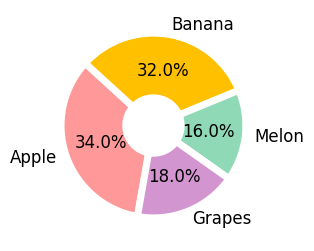

In [97]:
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

## 히트맵(Heatmap)
> 히트맵은 다양한 값을 갖는 숫자 데이터를 열분포 형태와 같이 색상을 이용해서 시각화한 것입니다.

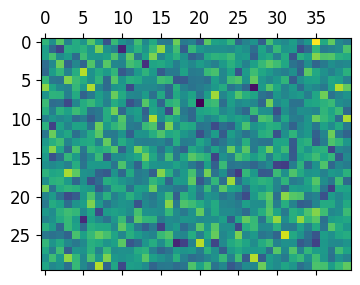

In [98]:
arr = np.random.standard_normal((30, 40))

plt.matshow(arr)

plt.show()

### 컬러바 나타내기

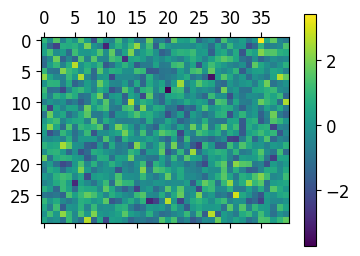

In [99]:
plt.matshow(arr)
plt.colorbar()

plt.show()

### 색상 범위 지정하기
>

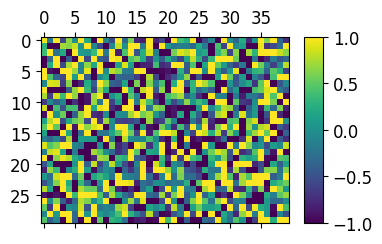

In [100]:
plt.matshow(arr)
plt.colorbar(shrink=0.8, aspect=10)
plt.clim(-1.0, 1.0)

plt.show()

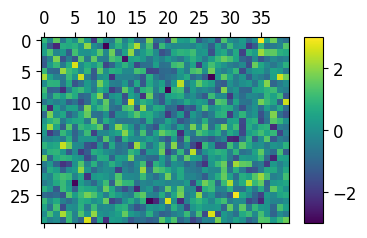

In [101]:
plt.matshow(arr)
plt.colorbar(shrink=0.8, aspect=10)
plt.clim(-3.0, 3.0)

plt.show()

### 컬러맵 지정하기

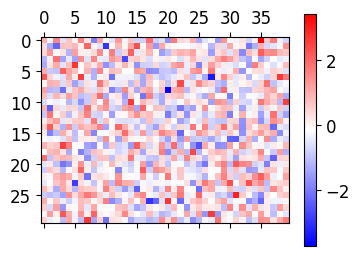

In [102]:
# cmap = plt.get_cmap('PiYG')
# cmap = plt.get_cmap('BuGn')
# cmap = plt.get_cmap('Greys')
cmap = plt.get_cmap('bwr')

plt.matshow(arr, cmap=cmap)
plt.colorbar()
plt.show()

## 박스 플롯 그리기

> 박스 플롯은 수치 데이터를 표현하는 그래프이다. 일반적으로 박스플롯은 전체 데이터로부터 얻어진 아래의 다섯 가지 요약 수치를 사용해서 그려집니다.  
> - 최소값
> - 제 1사분위 수(Q1)
> - 제 2사분위 수 또는 중위수(Q2)
> - 제 3사분위 수(Q3)
> - 최대값

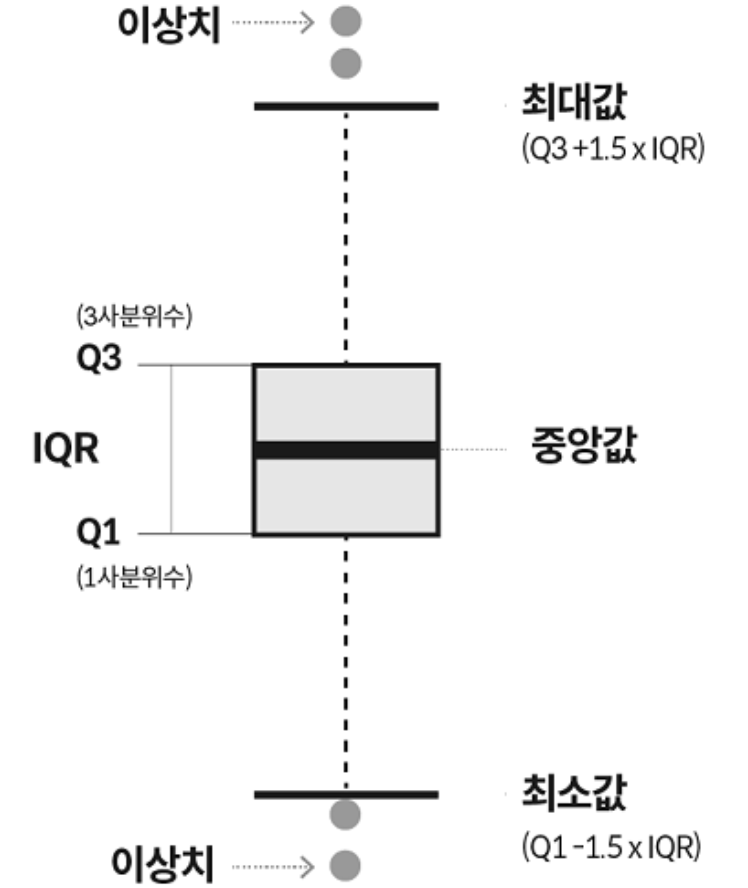

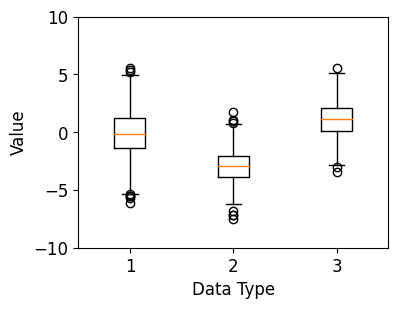

In [45]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
np.random.seed(0)
data_a = np.random.normal(0, 2.0, 1000)
data_b = np.random.normal(-3.0, 1.5, 500)
data_c = np.random.normal(1.2, 1.5, 1500)

# 3. 그래프 그리기
fig, ax = plt.subplots()

ax.boxplot([data_a, data_b, data_c])
ax.set_ylim(-10.0, 10.0)
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')

plt.show()


## 두 종류의 그래프 기르기

1. 우선 ax1.twinx()로 x축을 공유하는 이중 y축을 만든다.
2. ax1.plot()과 ax2.bar()를 사용해서 y1, y2 데이터를 각각 꺾은선 그래프와 막대 그래프의 형태로 나타낸다.

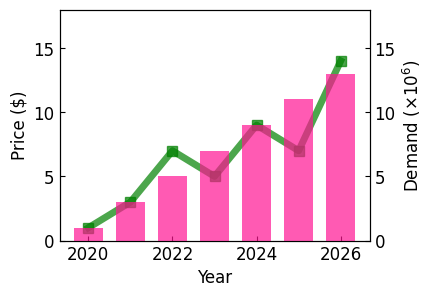

In [46]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = np.arange(2020, 2027)
y1 = np.array([1, 3, 7, 5, 9, 7, 14])
y2 = np.array([1, 3, 5, 7, 9, 11, 13])

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='green', markersize=7, linewidth=5, alpha=0.7, label='Price')
ax1.set_ylim(0, 18)
ax1.set_xlabel('Year')
ax1.set_ylabel('Price ($)')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='Demand', alpha=0.7, width=0.7)
ax2.set_ylim(0, 18)
ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')

plt.show()

### 그래프 순서 지정하기
> set_zorder()를 사용해서 그래프가 표시될 순서를 지정할 수 있다.

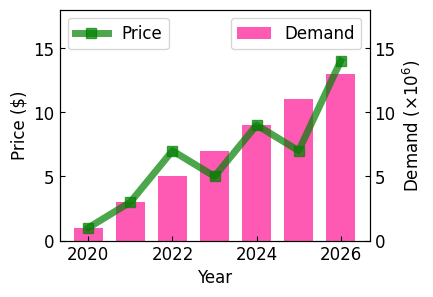

In [47]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = np.arange(2020, 2027)
y1 = np.array([1, 3, 7, 5, 9, 7, 14])
y2 = np.array([1, 3, 5, 7, 9, 11, 13])

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='green', markersize=7, linewidth=5, alpha=0.7, label='Price')
ax1.set_ylim(0, 18)
ax1.set_xlabel('Year')
ax1.set_ylabel('Price ($)')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='Demand', alpha=0.7, width=0.7)
ax2.set_ylim(0, 18)
ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')

# 4. 그래프 순서 지정
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()